# Makine Öğrenmesi Görevlerinin Otomatikleştirilmesi

In [5]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [8]:
df = pd.read_csv('diabetes.csv')
y= df['Outcome']
X= df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [10]:
knn_tuned= KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)
mlp_tuned = MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=(3, 5),max_iter=350, solver='lbfgs').fit(X_train,y_train)
svm_tuned = SVC(C=1,kernel='linear').fit(X_train,y_train)
cart_tuned = DecisionTreeClassifier(max_depth=5, min_samples_split=20).fit(X_train,y_train)
lgbm_tune = LGBMClassifier(force_col_wise=True, learning_rate=0.01, max_depth=1,n_estimators=500).fit(X_train,y_train)
rf_tuned = RandomForestClassifier(max_features=7, min_samples_split=10).fit(X_train,y_train)
xgb_tuned = XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators= 500, subsample= 0.8).fit(X_train,y_train)
catb_tuned= CatBoostClassifier(verbose=False, depth= 8, iterations= 200, learning_rate= 0.01).fit(X_train,y_train)

C:\Users\ycanf\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630


In [30]:
loj_model = LogisticRegression(solver='liblinear').fit(X,y)

In [31]:
modeller = [knn_tuned,
            mlp_tuned,
            svm_tuned,
            cart_tuned,
            lgbm_tune,
            rf_tuned,
            xgb_tuned,
            catb_tuned,
           loj_model]

sonuc =  []
sonuclar = pd.DataFrame(columns=['Modeller','Accuacy'])

for model in modeller:
    isimler= model.__class__.__name__
    y_pred=model.predict(X_test)
    dogruluk = accuracy_score(y_test,y_pred)
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns=['Modeller','Accuracy'])
    sonuclar = sonuclar.append(sonuc)

C:\Users\ycanf\AppData\Local\Temp\ipykernel_5744\608063643.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sonuclar = sonuclar.append(sonuc)
C:\Users\ycanf\AppData\Local\Temp\ipykernel_5744\608063643.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sonuclar = sonuclar.append(sonuc)
C:\Users\ycanf\AppData\Local\Temp\ipykernel_5744\608063643.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sonuclar = sonuclar.append(sonuc)
C:\Users\ycanf\AppData\Local\Temp\ipykernel_5744\608063643.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sonuclar = sonuclar.append(sonuc)
C:\Users\ycanf\AppData\Local\Temp\ipykernel_5744\608063643.p

In [32]:
sonuc

,Modeller,Accuracy
0,LogisticRegression,76.623377


In [33]:
sonuclar

,Modeller,Accuacy,Accuracy
0,KNeighborsClassifier,NaN,73.160173
0,MLPClassifier,NaN,60.606061
0,SVC,NaN,74.458874
0,DecisionTreeClassifier,NaN,75.324675
0,LGBMClassifier,NaN,75.757576
0,RandomForestClassifier,NaN,74.891775
0,XGBClassifier,NaN,76.190476
0,CatBoostClassifier,NaN,75.324675
0,LogisticRegression,NaN,76.623377


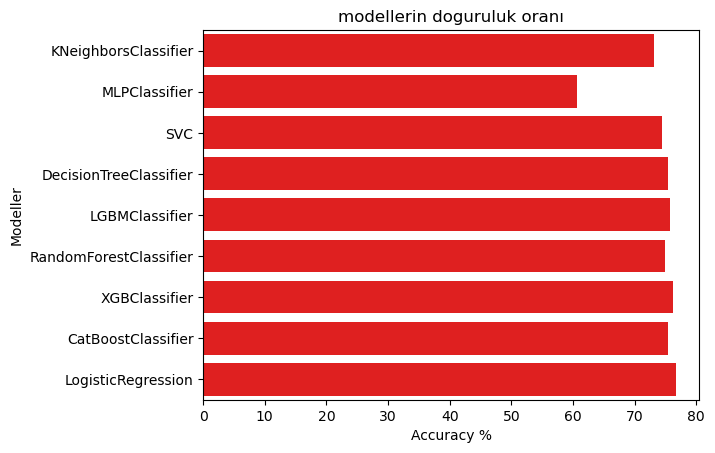

In [34]:
sns.barplot(x= 'Accuracy', y= 'Modeller', data = sonuclar, color = 'r')
plt.xlabel('Accuracy %')
plt.title('modellerin doguruluk oranı');

# Daha Başka Ne Yapılabilir ? 

1. Değişken türetme/değişken mühendisliği
2. Değişken seçme
3. Otomatik ML yaklaşımları , kütleri kullanılabilir.
4. Model Deployment

In [36]:
asd = np.arange(1,50)

In [38]:
type(asd)

numpy.ndarray